In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Алгоритм, принципы и параметры A/B-тестирования

ПРИНЦИПЫ A/B-ТЕСТИРОВАНИЯ:
1: ИСКЛЮЧИТЬ ВЛИЯНИЕ ИЗВНЕ
2: ДАННЫХ ДОЛЖНО БЫТЬ МНОГО
3: ПРАВИЛЬНЫЙ ИНСТРУМЕНТ АНАЛИЗА

Калькулятор Эвана Миллера
https://www.evanmiller.org/ab-testing/sample-size.html

Калькулятор VWO
https://vwo.com/tools/ab-test-duration-calculator/

# 4. Анализ результатов A/B-тестирования: кумулятивные метрики

#### ЗНАКОМИМСЯ С ДАННЫМИ

In [12]:
ab_data = pd.read_csv('data/ab_data.csv')
ab_data['timestamp'] = pd.to_datetime(ab_data['timestamp'], format='%Y-%m-%d')
ab_data

,user_id,timestamp,group,converted
0,851104,2017-01-21,A,0
1,804228,2017-01-12,A,0
2,661590,2017-01-11,B,0
3,853541,2017-01-08,B,0
4,864975,2017-01-21,A,1
...,...,...,...,...
290477,751197,2017-01-03,A,0
290478,945152,2017-01-12,A,0
290479,734608,2017-01-22,A,0
290480,697314,2017-01-15,A,0


In [17]:
daily_data = ab_data.groupby(['timestamp','group']).agg({
    'user_id':'count',
    'converted':'sum'
}).reset_index().rename(columns={'user_id': 'users_count'})
daily_data.head()

,timestamp,group,users_count,converted
0,2017-01-02,A,2851,357
1,2017-01-02,B,2848,339
2,2017-01-03,A,6584,749
3,2017-01-03,B,6620,754
4,2017-01-04,A,6573,797


In [18]:
daily_data['conversion'] = daily_data['converted'] / daily_data['users_count'] * 100
daily_data[(daily_data['timestamp'] == '2017-01-05') & (daily_data['group'] == 'A')]

,timestamp,group,users_count,converted,conversion
6,2017-01-05,A,6419,791,12.322792


#### ВИЗУАЛЬНЫЙ АНАЛИЗ КОНВЕРСИИ В ГРУППАХ

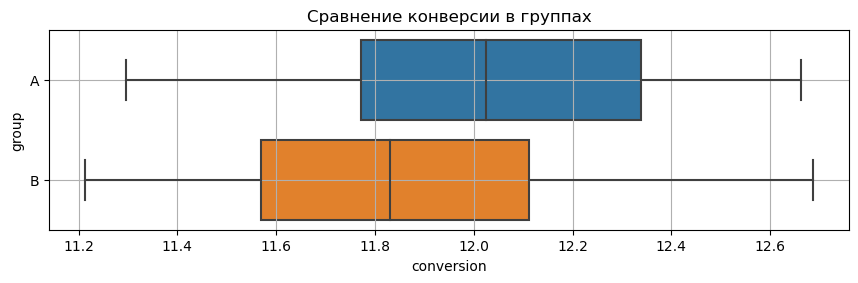

In [22]:
# создаём фигуру размером 8x2
fig = plt.figure(figsize=(8, 2)) 
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1]) 
# строим boxplot для conversion по признаку group
sns.boxplot(data=daily_data, x='conversion', y='group', ax=ax) 
# задаём подпись к графику
ax.set_title('Сравнение конверсии в группах')
# задаём отображение сетки
ax.grid();

In [23]:
conversion_piv = daily_data.groupby('group')['conversion'].agg(['mean', 'median'])
conversion_piv

,mean,median
group,,
A,12.032876,12.024261
B,11.872697,11.829582


#### КУМУЛЯТИВНЫЕ МЕТРИКИ